In [1]:
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

In [2]:
# Clone the tensorflow models repository
!git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 2673, done.
remote: Counting objects: 100% (2673/2673), done.
remote: Compressing objects: 100% (2222/2222), done.
remote: Total 2673 (delta 677), reused 1218 (delta 419), pack-reused 0
Receiving objects: 100% (2673/2673), 32.64 MiB | 30.03 MiB/s, done.
Resolving deltas: 100% (677/677), done.


In [3]:
%%bash
sudo apt install -y protobuf-compiler
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Reading package lists...
Building dependency tree...
Reading state information...
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-cp37-none-any.whl size=1650082 sha256=7ce1d8b389abf7145de70d86e3e56893363b4baa1f8f6a7c13925764fecc80ce
  Stored in directory: /tmp/pip-ephem-wheel-cache-ff1li0x4/wheels/94/49/4b/39b051683087a22ef7e80ec52152a27249d1a644ccf4e442ea
  Created wheel for avro-python3: filename=avro_python3-1.10.2-cp37-none-any.whl size=44011 sha256=22ed90e6194167ae2210a358deab245f74ae747dcfdbe65f1af1200b9f2161de
  Stored in directory: /root/.cache/pip/wheels/ee/ee/18/c466221ca6900e3efce2f4ea9c329288808679aecdcb2838d3
  Created wheel for dill: filename=dill-0.



ERROR: multiprocess 0.70.11.1 has requirement dill>=0.3.3, but you'll have dill 0.3.1.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: apache-beam 2.29.0 has requirement avro-python3!=1.9.2,<1.10.0,>=1.8.1, but you'll have avro-python3 1.10.2 which is incompatible.


In [4]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import ops as utils_ops

%matplotlib inline

In [5]:
PATH_TO_LABELS = './models/research/object_detection/data/mscoco_label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [6]:
#Helper functions
def load_image(path):
  img = tf.io.read_file(path)
  img = tf.io.decode_jpeg(img, channels=3)
  img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]
  return img
def display_image(path):
  img = plt.imread(path)
  plt.figure(figsize=(20,10))
  plt.imshow(img)
  return None

In [7]:
#Load Model
module_handle = 'https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1'
detector = hub.load(module_handle).signatures['default']

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [8]:
#Detect objects
image_path = '/content/Naxos_Taverna.jpeg'
img = load_image(image_path)
result = detector(img)

In [9]:
results = {key:value.numpy() for key,value in result.items()}
print(results.keys())

dict_keys(['detection_class_names', 'detection_boxes', 'detection_scores', 'detection_class_labels', 'detection_class_entities'])


In [10]:
image_np = plt.imread(image_path)

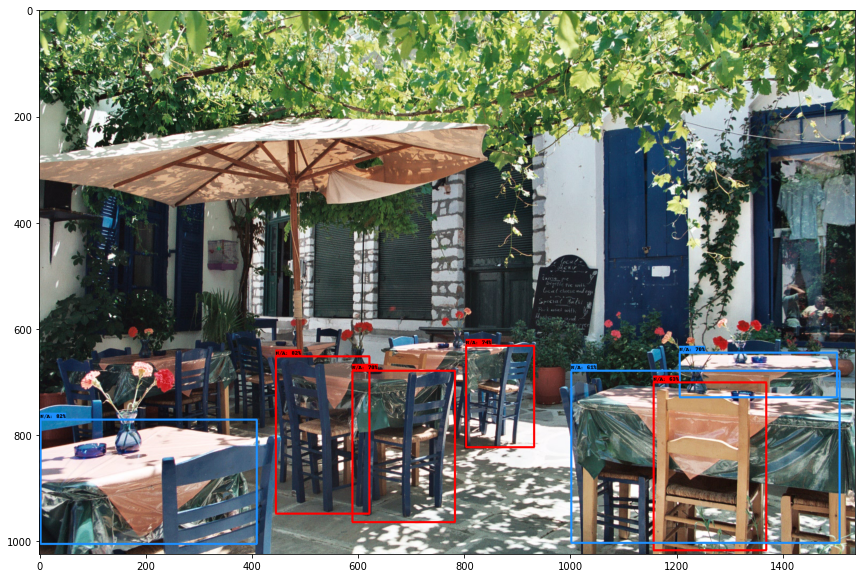

In [19]:
label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      boxes = results['detection_boxes'],
      classes = (results['detection_class_labels'] + label_id_offset).astype(int),
      scores = results['detection_scores'],
      category_index = category_index,
      use_normalized_coordinates=True,
      min_score_thresh=.6)
plt.figure(figsize=(24,10))
plt.imshow(image_np_with_detections)
plt.show()

In [26]:
#Category index is not correct